# PEMODELAN REGRESI LOGISTIK

## Tahap 1: Membaca Data

In [1]:
#import library
import pandas as pd

In [2]:
#import data
datapilot = pd.read_csv('D:\data propensity.csv',delimiter=',') 

#menampilkan beberapa baris pertama datapilot
datapilot.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia,Tertarik
0,1,5.494,9,Perempuan,rural,2,2,44,0
1,2,4.700,3,Perempuan,urban,2,4,39,0
2,3,4.496,5,Laki-Laki,rural,3,2,36,0
3,4,4.360,5,Perempuan,urban,8,2,37,0
4,5,18.866,9,Laki-Laki,rural,2,3,30,1


## Tahap 2: Melihat hubungan antara prediktor dengan variabel target

In [3]:
#crosstab antara Jenis Kelamin dengan variabel Tertarik
pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'])

Tertarik,0,1
Jenis Kelamin,,
Laki-Laki,2962,765
Perempuan,3027,746


In [4]:
#crosstab antara Jenis Kelamin dengan variabel Tertarik  (persen baris)
pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'],normalize='index')

Tertarik,0,1
Jenis Kelamin,,
Laki-Laki,0.794741,0.205259
Perempuan,0.802279,0.197721


In [5]:
cross= pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'],normalize='index')

#import library
import matplotlib.pyplot as plt

#menampilkan bar plot
plt.bar(cross.index,cross[1])

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

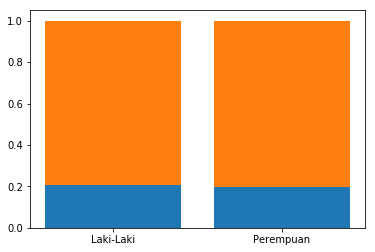

In [6]:
cross= pd.crosstab(datapilot['Jenis Kelamin'],datapilot['Tertarik'],normalize='index')

plt.bar(cross.index,cross[1])
plt.bar(cross.index,cross[0],bottom=cross[1])

In [7]:
#Binning frekuensi ATM
bins = [-1,3,10,40]
label = [1,2,3]
datapilot['Frek ATM bin']= pd.cut(datapilot['Frek ATM'],bins=bins, labels=label).astype(int)
datapilot.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia,Tertarik,Frek ATM bin
0,1,5.494,9,Perempuan,rural,2,2,44,0,2
1,2,4.700,3,Perempuan,urban,2,4,39,0,1
2,3,4.496,5,Laki-Laki,rural,3,2,36,0,2
3,4,4.360,5,Perempuan,urban,8,2,37,0,2
4,5,18.866,9,Laki-Laki,rural,2,3,30,1,2


<BarContainer object of 3 artists>

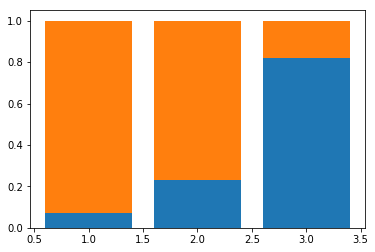

In [10]:
cross= pd.crosstab(datapilot['Frek ATM bin'],datapilot['Tertarik'],normalize='index')

plt.bar(cross.index,cross[1])
plt.bar(cross.index,cross[0],bottom=cross[1])

### Tugas 1

1. Lakukan binning terhadap variabel Usia
   Kategori 1 : Usia <= 25;
   Kategori 2 : 25 < Usia <= 30;
   Kategori 3 : 30 < Usia <= 35;
   Kategori 4 : 35 < Usia <= 40;
   Kategori 5 : 40 < Usia <= 45;
   Kategori 6 : Lainnya,
   Kemudian buat bar plot untuk melihat peluang ketertarikan di masing-masing kelompok! Informasi apa yang bisa anda dapatkan.
2. Lakukan binning terhadap variabel Frekuensi Supermarket, 
   Kategori 1 : Frek = 0;
   Kategori 2 : Frek = 1;
   Kategori 3 : Frek = 2;
   Kategori 4 : Frek = 3;
   Kategori 5 : Frek = 4;
   Kategori 6 : Frek = 5;
   Kategori 7 : Frek > 5.
   lalu buat bar plot untuk melihat peluang ketertarikan di masing-masing kelompok! Informasi apa yang bisa anda dapatkan.
3. Lakukan binning terhadap variabel Frekuensi Departemen Store, 
   Kategori 1 : Frek = 0;
   Kategori 2 : Frek = 1;
   Kategori 3 : Frek = 2;
   Kategori 4 : Frek = 3;
   Kategori 5 : Frek = 4;
   Kategori 6 : Frek = 5;
   Kategori 7 : Frek > 5.
   lalu buat bar plot untuk melihat peluang ketertarikan di masing-masing kelompok! Informasi apa yang bisa anda dapatkan.
4. Lakukan binning terhadap variabel Saldo
   Kategori 1 : Saldo <= 3;
   Kategori 2 : 3 < Saldo <= 5;
   Kategori 3 : 5 < Saldo <= 8;
   Kategori 4 : 8 < Saldo <= 10;
   Kategori 5 : 10 < Saldo <= 20;
   Kategori 6 : 20 < Saldo <= 50;
   Kategori 7 : Saldo > 50;
   Kemudian buat bar plot untuk melihat peluang ketertarikan di masing-masing kelompok! Informasi apa yang bisa anda dapatkan.

## Tahap 3: Membuat data training dan data testing

In [11]:
#membuat variabel dummy variabel yang memiliki type string
datapilot['jk']=datapilot['Jenis Kelamin'].astype('category').cat.codes
datapilot['dtempat']=datapilot['tempat tinggal'].astype('category').cat.codes


#memisahkan variabel X dan variabel Y ke dataframe berbeda
x=datapilot[['Saldo','Frek ATM', 'jk','dtempat','Frek Supermarket','Frek Dept Store','Usia']]
y=datapilot['Tertarik']

In [12]:
#membuat dataset training (70%) dan testing (30%) secara random
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [13]:
#menampilkan beberapa baris awal dari varabel x yang akan digunakan
x.head()

,Saldo,Frek ATM,jk,dtempat,Frek Supermarket,Frek Dept Store,Usia
0,5.494,9,1,0,2,2,44
1,4.700,3,1,1,2,4,39
2,4.496,5,0,0,3,2,36
3,4.360,5,1,1,8,2,37
4,18.866,9,0,0,2,3,30


## Tahap 4: Membuat model regresi logistik berdasarkan data training

In [14]:
#pembuatan model berdasarkan data training
from sklearn.linear_model import LogisticRegression
logistik = LogisticRegression(C=10000000000000000000000000000000000)

#model data training
logistik.fit(x_train,y_train)

LogisticRegression(C=10000000000000000000000000000000000, class_weight=None,
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

In [15]:
#menampilkan intercep yang dihasilkan oleh model
logistik.intercept_

array([10.47815807])

In [16]:
#menampilkan koefisiensetiap variabel prediktor
logistik.coef_

array([[ 0.21233064,  0.3627045 , -1.00685762,  0.00485796,  0.58500373,
         0.73774127, -0.51995359]])

## Tahap 5: Evaluasi model

In [17]:
#menampilkan matriks konfusi dari data training
y_prediksi = logistik.predict (x_train)
from sklearn import metrics
klasifikasi = metrics.confusion_matrix(y_train,y_prediksi)
klasifikasi

array([[4097,  109],
       [ 198,  846]], dtype=int64)

In [18]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training
print("Accuracy:",metrics.accuracy_score(y_train, y_prediksi))
print("Precision:",metrics.precision_score(y_train, y_prediksi))
print("Recall:",metrics.recall_score(y_train, y_prediksi))
print("Specificity:",metrics.recall_score(y_train, y_prediksi))

Accuracy: 0.9415238095238095
Precision: 0.8858638743455497
Recall: 0.8103448275862069
Specificity: 0.8103448275862069


In [19]:
#cara lain mendapatkan matriks konfusi
klasifikasi=pd.crosstab(y_train,y_prediksi)
klasifikasi

col_0,0,1
Tertarik,,
0,4097,109
1,198,846


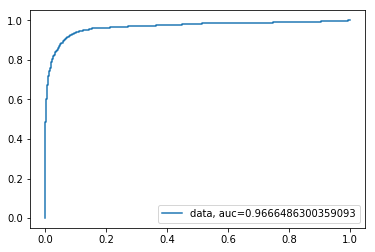

In [20]:
# kurva ROC untuk data training
y_pred_proba = logistik.predict_proba(x_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Tugas 2

1. Tampilkan matriks konfusi dan hasil evaluasi model untuk data testing.
2. Tampilkan kurva ROC berdasarkan data testing.

## Tahap 6: Prediksi data pelanggan lain yang menjadi target dan menampilkan 500 pelanggan paling prospektif

In [22]:
#import data
datalain = pd.read_csv('D:\ingin diprediksi.csv',delimiter=',') 
datalain.head()

,No,Saldo,Frek ATM,Jenis Kelamin,tempat tinggal,Frek Supermarket,Frek Dept Store,Usia
0,7501,10.173,6,Laki-Laki,urban,3,7,33
1,7502,19.558,10,Laki-Laki,urban,3,6,37
2,7503,31.807,15,Laki-Laki,rural,6,7,40
3,7504,12.924,13,Laki-Laki,urban,5,1,38
4,7505,0.115,0,Laki-Laki,rural,3,0,45


In [23]:
#membuat dummy variabel untuk variabel yang bertype string
datalain['jk']=datalain['Jenis Kelamin'].astype('category').cat.codes
datalain['dtempat']=datalain['tempat tinggal'].astype('category').cat.codes

#Pemilihan variabel X yang akan digunakan
x_lain=datalain[['Saldo','Frek ATM', 'jk','dtempat','Frek Supermarket','Frek Dept Store','Usia']]

In [24]:
#memprediksi nilai peluang ketertarikan pelanggan baru
y_prediksilain = logistik.predict_proba(x_lain)[::,1]
y_prediksilain

array([9.89849343e-01, 9.94546340e-01, 9.99973765e-01, ...,
       1.61377300e-02, 8.26310861e-05, 1.78081138e-01])

In [25]:
#menyimpan nilai prediksi peluang dan ID pelanggan 
datatarget= pd.concat([datalain['No'],pd.DataFrame(y_prediksilain)],axis=1)
datatarget.head()

,No,0
0,7501,0.989849
1,7502,0.994546
2,7503,0.999974
3,7504,0.863758
4,7505,0.000015


In [26]:
#menampilkan 500 pelanggan paling prospektif
#sorting nilai peluang
datatarget_urut=datatarget.sort_values(by=0,ascending=False)


#print nama kolom
print(datatarget_urut.columns)

#rename nama kolom
datatarget_urut.rename(columns={0:'peluang'},
                 inplace=True)

#mengambil 500 pelanggan yang paling prospektif dilihat dari peluang paling tinggi
datatarget_urut.head(500)

Index(['No', 0], dtype='object')


,No,peluang
3927,11428,1.000000
735,8236,1.000000
2062,9563,1.000000
5143,12644,1.000000
3205,10706,1.000000
5457,12958,1.000000
2792,10293,1.000000
5484,12985,1.000000
4866,12367,1.000000
3311,10812,1.000000
